In [1]:
from scipy import stats
import numpy as np
import pandas as pd
import math
import scipy

In [2]:
x=[10,12,20,21,22,24,18,15]
stats.ttest_1samp(x,15)

Ttest_1sampResult(statistic=1.5623450931857947, pvalue=0.1621787560592894)

In [3]:
def z_value(x,mu,sem):
    z=(x-mu)/sem
    if (z<0):
        alfa=stats.norm.cdf(z)
    else:
        alfa=1-stats.norm.cdf(z)
    print(alfa)

In [4]:
x=48.5
mu=50
sem=0.79

In [5]:
z_value(x,mu,sem)

0.02879971774715278


In [6]:
beta=stats.norm.cdf((51.5-52)/0.79)

In [7]:
beta

0.26339575390741593

In [8]:
betea=stats.norm.cdf((51.5-50.5)/0.79)

In [9]:
betea

0.8972117321157791

In [10]:
def type2(mu1,mu2,sigma,n,alpha):
    z=stats.norm.ppf(alpha)
    xbar=(mu1)+(z*sigma/np.sqrt(n))
    z2=(xbar-mu2)/(sigma/np.sqrt(n))
    if(mu1>mu2):
        beta=1-stats.norm.cdf(z2)
    else:
        beta=stats.norm.cdf(z2)
    print(beta)

In [11]:
type2(8.3,7.4,3.1,60,0.05)

0.27292999450730004


In [12]:
def Z_and_P(x1,x2,sigma1,sigma2,n1,n2):
    z=x1-x2/(math.sqrt(((sigma1**2)/n1))+((sigma2**2)/n2))
    if(z<0):
        p=stats.norm.cdf(z)
    else:
        p=1-stats.norm.cdf(z)
        print(z,p)

In [13]:
Z_and_P(121,112,8,8,10,10)

108.45775689673283 0.0


In [14]:
scipy.stats.f.ppf(q=1-.05,dfn=15,dfd=10)

2.8450165269958436

In [15]:
scipy.stats.f.ppf(q=0.05,dfn=10,dfd=15)

0.3514918069934505

In [16]:
a=[4,3,2]

In [17]:
b=[2,4,6]

In [18]:
c=[2,1,3]

In [19]:
stats.f_oneway(a,b,c)

F_onewayResult(statistic=1.5, pvalue=0.2962962962962962)

In [20]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from matplotlib import pyplot as plt

In [21]:
fivepercent=[7,8,15,11,9,10]
tenpercent=[12,17,13,18,19,15]
fiveteenpercent=[14,18,19,17,16,18]
twentypercent=[19,15,22,23,18,20]

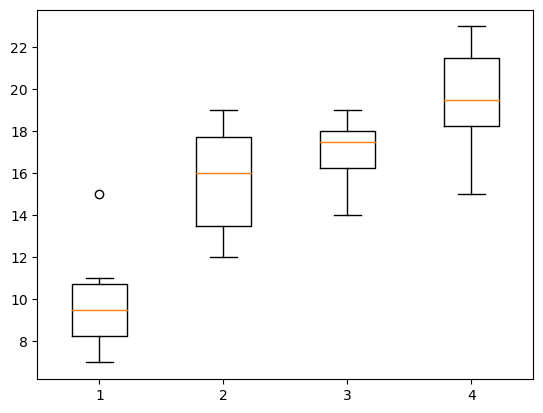

In [22]:
box_plot_data=[fivepercent,tenpercent,fiveteenpercent,twentypercent]
plt.boxplot(box_plot_data)
plt.show()

In [23]:
df=pd.read_excel('C:\\Users\\Arpit Akar\\Desktop\\concentration.xlsx')

In [24]:
df

,hardwood concentration 5%,hardwood concentration 10%,hardwood concentration 15%,hardwood concentration 20%
0,7,12,14,19
1,8,17,18,25
2,15,13,19,22
3,11,18,17,23
4,9,19,16,18
5,10,15,18,20


In [25]:
data_r1=pd.melt(df.reset_index(),id_vars=['index'],value_vars=['hardwood concentration 5%','hardwood concentration 10%','hardwood concentration 15%','hardwood concentration 20%'])
data_r1.columns=['index','treatments','value']

In [26]:
model=ols('value ~ C(treatments)',data=data_r1).fit()

In [27]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     19.61
Date:                Thu, 23 Mar 2023   Prob (F-statistic):           3.59e-06
Time:                        20:17:34   Log-Likelihood:                -54.344
No. Observations:                  24   AIC:                             116.7
Df Residuals:                      20   BIC:                             121.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                      15.6667      1.041     15.042      0.000      13.494      17.839
C(treatments)[T.hardwood concentration 15%]     1.3333      1.473      0.905      0.376      -1.739       4.406
C(treatments)[T.hardwood concentration 20%]     5.5000      1.473      3.734      0.001       2.428       8.572
C(treatments)[T.hardwood concentration 5%]     -5.6667      1.473     -3.847      0.001      -8.739      -2.594
==============================================================================
Omnibus:                        0.929   Durbin-Watson:                   2.181
Prob(Omnibus):                  0.628   Jarque-Bera (JB):                0.861
Skew:                           0.248   Prob(JB):                        0.650
Kurtosis:                       2.215   Cond. No.                         4.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
aov_table=sm.stats.anova_lm(model,typ=1)
aov_table


,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),3.0,382.791667,127.597222,19.605207,0.000004
Residual,20.0,130.166667,6.508333,NaN,NaN


In [29]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc=MultiComparison(data_r1['value'],data_r1['treatments'])
mcresult=mc.tukeyhsd(0.05)
mcresult.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
hardwood concentration 10%,hardwood concentration 15%,1.3333,0.8022,-2.7892,5.4559,False
hardwood concentration 10%,hardwood concentration 20%,5.5,0.0066,1.3774,9.6226,True
hardwood concentration 10%,hardwood concentration 5%,-5.6667,0.0051,-9.7892,-1.5441,True
hardwood concentration 15%,hardwood concentration 20%,4.1667,0.047,0.0441,8.2892,True
hardwood concentration 15%,hardwood concentration 5%,-7.0,0.0007,-11.1226,-2.8774,True
hardwood concentration 20%,hardwood concentration 5%,-11.1667,0.0,-15.2892,-7.0441,True


In [30]:
scipy.stats.f.ppf(1-.05,dfn=4,dfd=20)

2.8660814020156584

In [31]:
scipy.stats.f.ppf(1-.05,dfn=5,dfd=114)

2.2939111578278037

In [32]:
df=pd.read_excel('C:\\Users\\Arpit Akar\\Downloads\\_RBD.xlsx')

In [33]:
df

,System A,System B,System C
0,15,15,18
1,14,14,14
2,10,11,15
3,13,12,17
4,16,13,16
5,13,13,13


In [34]:
data=pd.melt(df.reset_index(),id_vars=['index'],value_vars=['System A','System B','System C'])
data.columns=['Index','Treatments','value']

In [35]:
model=ols('value ~ C(Treatments)',data=data).fit()
anova_table=sm.stats.anova_lm(model,typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Treatments),2.0,21.0,10.500000,3.214286,0.068903
Residual,15.0,49.0,3.266667,NaN,NaN


In [36]:
data=pd.melt(df.reset_index(),id_vars=['index'],value_vars=['System A','System B','System C'])
data.columns=['blocks','Treatments','value']

In [37]:
df=pd.read_excel('C:\\Users\\Arpit Akar\\Downloads\\rbd2.xlsx')
df

,chem1,chem2,chem3,chem4
0,1.3,2.2,1.8,3.9
1,1.6,2.4,1.7,4.4
2,0.5,0.4,0.6,2.0
3,1.2,2.0,1.5,4.1
4,1.1,1.8,1.3,3.4


In [38]:
data=pd.melt(df.reset_index(),id_vars=['index'],value_vars=['chem1','chem2','chem3','chem4'])
data.columns=['Fabric','chemical','value']

In [39]:
data

,Fabric,chemical,value
0,0,chem1,1.3
1,1,chem1,1.6
2,2,chem1,0.5
3,3,chem1,1.2
4,4,chem1,1.1
5,0,chem2,2.2
6,1,chem2,2.4
7,2,chem2,0.4
8,3,chem2,2.0
9,4,chem2,1.8


In [40]:
model=ols('value ~ C(Fabric)+C(chemical)',data=data).fit()
anova_table=sm.stats.anova_lm(model,typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Fabric),4.0,6.693,1.673250,21.113565,2.318913e-05
C(chemical),3.0,18.044,6.014667,75.894848,4.518310e-08
Residual,12.0,0.951,0.079250,NaN,NaN


In [41]:
df2=pd.read_excel('C:\\Users\\Arpit Akar\\Downloads\\Twoway.xlsx')

In [42]:
df2

,Value,prep_pro,college
0,500,three_hr,Business
1,580,three_hr,Business
2,540,three_hr,Engineering
3,460,three_hr,Engineering
4,480,three_hr,Artsandscience
5,400,three_hr,Artsandscience
6,460,One-day,Business
7,540,One-day,Business
8,560,One-day,Engineering
9,620,One-day,Engineering


In [43]:
formula='Value ~ C(college)+C(prep_pro)+C(college):C(prep_pro)'
model=ols(formula,df2).fit()
akar_table = sm.stats.anova_lm(model,typ=2)

In [44]:
akar_table

,sum_sq,df,F,PR(>F)
C(college),45300.0,2.0,10.269521,0.004757
C(prep_pro),6100.0,2.0,1.382872,0.299436
C(college):C(prep_pro),11200.0,4.0,1.269521,0.350328
Residual,19850.0,9.0,NaN,NaN
